In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import statistics
import time
import warnings
warnings.filterwarnings('ignore')
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport
#!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
#from plotly.offline import plot, iplot
#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.express as px

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
t_total = time.perf_counter()

In [3]:
params = {'figure.figsize': [10,10],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.autolayout': True
    }

plt.rcParams.update(params)

In [5]:
col_list = ["Post","Data","Categoria","Área","Título Representativo","Mídia","SEO","Links I.","Links E.",
            "Complexidade","Introdução","Analogias","Interação","Siglas","Visualizações"]

df = pd.read_excel("dataset-pgc-manual.xlsx", usecols=col_list)

df2 = pd.read_excel("dataset-pln.xlsx")

df = df.join(df2)

print(df.tail(5))

                                           Post       Data  \
150                           O futuro da carne 2020-08-31   
151              Amazônia: fatos e curiosidades 2020-09-05   
152      O que está acontecendo com os insetos? 2020-09-14   
153  Perigos na mistura de produtos de limpeza! 2020-09-21   
154   Qual a diferença entre rinite e sinusite? 2020-09-28   

                    Categoria      Área  Título Representativo  Mídia  SEO  \
150  O que que a ciência tem?  Biologia                      0      1    1   
151          Ciência ao redor  Biologia                      1      2    1   
152          Ciência ao redor  Biologia                      1      3    1   
153          Ciência ao redor   Química                      1      1    1   
154  O que que a ciência tem?  Medicina                      1      1    1   

     Links I.  Links E.  Complexidade  Introdução  Analogias  Interação  \
150         0        12             1           1          0          1   
151     

In [6]:
import datetime
#dt = datetime.datetime.today()
dt = datetime.datetime(year=2020,month=9,day=1, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, fold=0)
print(dt)
# 2020-03-01 00:00:00

dias = []

for i in range(df['Data'].size):
    dias.append((dt-df['Data'][i]).days)

print(dias)
df['Dias'] = dias
df.drop('Data',axis=1,inplace=True)

2020-09-01 00:00:00
[818, 810, 809, 806, 778, 776, 773, 771, 769, 768, 767, 766, 764, 762, 759, 757, 755, 752, 750, 747, 743, 740, 736, 733, 729, 726, 722, 719, 715, 712, 708, 705, 701, 698, 694, 691, 687, 684, 680, 677, 676, 673, 670, 666, 656, 652, 645, 638, 616, 610, 610, 603, 596, 589, 582, 575, 568, 561, 554, 540, 533, 529, 526, 520, 514, 512, 505, 502, 498, 491, 488, 484, 478, 470, 463, 456, 449, 442, 436, 430, 428, 421, 414, 409, 407, 400, 393, 386, 379, 372, 365, 358, 351, 344, 337, 330, 327, 323, 316, 309, 302, 295, 288, 281, 274, 267, 260, 253, 246, 245, 239, 232, 225, 218, 211, 204, 197, 190, 183, 176, 169, 162, 155, 148, 141, 139, 137, 134, 132, 130, 127, 125, 120, 113, 106, 99, 92, 85, 78, 71, 65, 64, 57, 50, 43, 36, 29, 22, 15, 8, 1, -4, -13, -20, -27]


In [7]:
# Mostrando quantos textos tem de cada Categoria
df.groupby('Categoria').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Categoria,
Ciência ao redor,54
O que que a ciência tem?,49
Profissão Cientista,17
Ciência Pop,10
Sci… what?,10
Outros,8
ABC da ciência,4
Você disse ciência?,3


In [8]:
# Mostrando quantos textos tem de cada Área

df.groupby('Área').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Área,
Biologia,29
Ciência,24
Química,23
Física,21
Medicina,15
História,14
Astronomia,8
Atualidades,7
Matemática,7


In [9]:
@interact
def exibir_df(column=['Visualizações','tamParagraf','tamTitulo','numPal','numPar'], x=(0,3000,5)):
#def exibir(column=list(df.select_dtypes('number')), x=(0,3000)):
    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('Visualizações', 'tamParagraf', 'tamTitulo', 'nu…

In [10]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 HUE=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, hue=HUE, data=df, height=size, legend_out=False, truncate=True)
    plt.grid()

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [11]:
Q1, Q3 = np.percentile(df['Visualizações'], [25, 75])
print('Primeiro quartil ou Pecentil 25:',Q1)
print('Terceiro quartil ou percentil 75:',Q3)
amplitude_interquartil = Q3 - Q1
print('Amplitude interquartil:',amplitude_interquartil)
limite_inferior = Q1 - (1.5 * amplitude_interquartil)
limite_superior = Q3 + (1.5 * amplitude_interquartil)
print('Limite Inferior:',limite_inferior )
print('Limite Superior:',limite_superior )

# IQR = Interquartile Range

Primeiro quartil ou Pecentil 25: 190.0
Terceiro quartil ou percentil 75: 783.5
Amplitude interquartil: 593.5
Limite Inferior: -700.25
Limite Superior: 1673.75


In [12]:
df[df["Visualizações"] > limite_superior]

,Post,Categoria,Área,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,Pergunta,tamMédioParagraf,tamTitulo,refs,Dias
15,"A ciência que você vê, mas não percebe!",Ciência ao redor,Ciência,1,2,1,0,5,1,1,1,1,1,2367,449,10,0.3007,0.0601,0.1359,0.0312,0.1960,0.0423,0.0379,0.0980,0.0000,0,335,39,15,757
30,Todo remédio é uma droga?,O que que a ciência tem?,Medicina,1,1,1,0,1,2,1,0,1,1,2330,292,7,0.3699,0.0685,0.0856,0.0685,0.1781,0.0582,0.0582,0.1096,0.0068,1,387,25,4,708
43,O que é água alcalina?,Você disse ciência?,Química,1,1,1,0,9,2,1,0,1,1,1856,691,11,0.2836,0.0912,0.1071,0.0101,0.1737,0.0434,0.0535,0.1056,0.0130,1,443,22,7,666
46,O que (não) é quântica!,Você disse ciência?,Física,1,1,1,0,15,2,1,0,1,1,2860,1044,14,0.2912,0.0987,0.1140,0.0335,0.1695,0.0460,0.0479,0.1207,0.0067,0,555,23,5,645
67,Resenha – O menino que descobriu o vento,Ciência Pop,Ciência,1,1,1,0,5,1,1,0,0,1,12068,443,11,0.3002,0.0835,0.1151,0.0248,0.2032,0.0384,0.0609,0.0903,0.0023,0,302,40,2,502
68,A quantos graus ferve a água?,Ciência ao redor,Física,1,1,1,0,11,2,1,0,1,1,9180,706,10,0.3272,0.0652,0.1176,0.0708,0.1898,0.0326,0.0496,0.1218,0.0142,1,545,29,4,498
83,"Se o homem foi à Lua em 1969, por que nunca vo...",Ciência ao redor,Astronomia,1,7,1,0,11,2,1,0,1,1,2255,1452,25,0.3815,0.0627,0.0950,0.1935,0.1742,0.0372,0.0461,0.0999,0.0234,1,368,51,1,409
104,Por que usamos “cloro” (ou água sanitária) par...,Ciência ao redor,Química,1,1,1,0,5,2,1,0,1,1,2274,779,9,0.2991,0.0834,0.1168,0.0321,0.1579,0.0436,0.0591,0.1271,0.0013,1,685,68,2,274
105,O que acontece no seu corpo após tomar aquela ...,Ciência ao redor,Química,1,1,0,0,8,2,1,0,1,1,4390,934,15,0.3126,0.0771,0.1178,0.0118,0.1959,0.0418,0.0385,0.1049,0.0182,1,426,61,2,267
127,Os barulhos no céu!,Ciência ao redor,Física,1,1,1,0,4,1,1,0,1,1,1714,654,7,0.3180,0.0688,0.1239,0.0826,0.1682,0.0321,0.0719,0.1086,0.0138,0,811,19,0,134


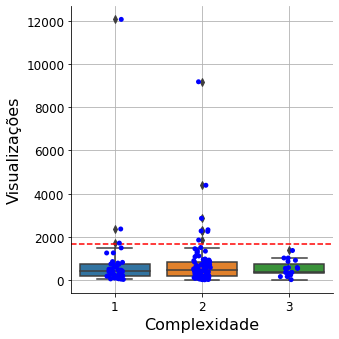

In [49]:
sns.catplot(x='Complexidade', y='Visualizações', kind='box', data=df, height=5)
sns.stripplot(x='Complexidade', y="Visualizações", data=df, color="blue");
plt.plot([-0.5,2.5], [limite_superior,limite_superior], color='red', linestyle='--')
#plt.annotate('Limite Superior',
        #xy=(2.5, limite_superior), xycoords='data',
        #xytext=(-15, 5), textcoords='offset points',
        #arrowprops=dict(facecolor='red', shrink=0.05))#,
        #horizontalalignment='right', verticalalignment='bottom')
plt.tight_layout()
plt.grid()
#plt.xticks(rotation=45)
#plt.savefig("boxplot1.png")

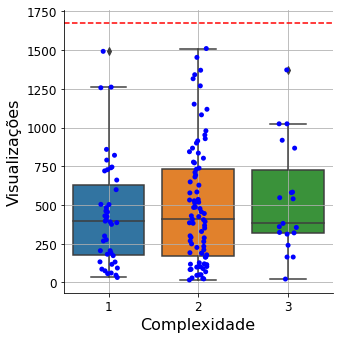

In [51]:
df_outlier = df.drop(df[df.Visualizações > limite_superior].index)

sns.catplot(x='Complexidade', y='Visualizações', kind='box', data=df_outlier, height=5)
sns.stripplot(x='Complexidade', y="Visualizações", data=df_outlier, color="blue");
plt.plot([-0.5,2.5], [limite_superior,limite_superior], color='red', linestyle='--')
plt.tight_layout()
plt.grid()
#plt.xticks(rotation=45)
#plt.savefig("boxplot2.png")

In [33]:
@interact
def cat_plot(X=['Área','Categoria'],
             KIND=['box','boxen'],
                 size=(0,15,1)):
    sns.catplot(x=X, y='Visualizações', kind=KIND, data=df, height=size)
    sns.stripplot(x=X, y="Visualizações", data=df, color="blue");
    plt.plot([-0.5,10.5], [limite_superior,limite_superior], color='red', linestyle='--')
    plt.annotate('Limite Superior',
            xy=(4, limite_superior), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')
    plt.tight_layout()
    plt.grid()
    plt.xticks(rotation=45)
    #plt.savefig("boxplot.pdf")

interactive(children=(Dropdown(description='X', options=('Área', 'Categoria'), value='Área'), Dropdown(descrip…

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 30 columns):
Post                     155 non-null object
Categoria                155 non-null object
Área                     155 non-null object
Título Representativo    155 non-null int64
Mídia                    155 non-null int64
SEO                      155 non-null int64
Links I.                 155 non-null int64
Links E.                 155 non-null int64
Complexidade             155 non-null int64
Introdução               155 non-null int64
Analogias                155 non-null int64
Interação                155 non-null int64
Siglas                   155 non-null int64
Visualizações            155 non-null int64
numPal                   155 non-null int64
numPar                   155 non-null int64
numSub                   155 non-null float64
numAdj                   155 non-null float64
numVrb                   155 non-null float64
numNEs                   155 non-null float64
numD

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Relatório PGC - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC.html")

In [ ]:
df.drop('Post',axis=1,inplace=True)

In [ ]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns[1:])):
    fig = px.scatter(x=df[X], y=df[Y])
    fig.show()

In [ ]:
blue_red = ["#0000FF", "#FF0000"];
colors = sns.color_palette(blue_red);
sns.lmplot(x='Dias', y='Visualizações', hue='Pergunta', data=df, palette=colors, height=8, legend_out=False, truncate=True)
plt.grid()

In [ ]:
def colorRedBlue(answer):
    colors=[]
    for a in answer:
        if a==1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

In [ ]:
x = df['Dias']
y = df['Visualizações']
cols=colorRedBlue(df['Pergunta'])
plt.scatter(x,y)
plt.title('Visualizações x Dias')
plt.xlabel('Dias')
#plt.gca().invert_xaxis()
plt.ylabel('Visualizações')
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Dias','Não pergunta','Pergunta'))
plt.grid()
plt.show()

In [ ]:
df_pergunta = list(df.loc[df['Pergunta'] == 1].copy()['Visualizações'])
df_nao_pergunta = list(df.loc[df['Pergunta'] == 0].copy()['Visualizações'])

print(df_pergunta)
print(df_nao_pergunta)

In [ ]:
x = statistics.mean(df_pergunta)
y = statistics.mean(df_nao_pergunta)
print(f"Média\nPergunta: {round(x,2)}\nNão-pergunta: {round(y,2)}\n")

x = statistics.median(df_pergunta)
y = statistics.median(df_nao_pergunta)
print(f"Mediana\nPergunta: {x}\nNão-pergunta: {y}\n")

#x = statistics.mode(df_pergunta)
#y = statistics.mode(df_nao_pergunta)
#print(f"Moda\nPergunta: {x}\nNão-pergunta: {y}\n")

x = statistics.stdev(df_pergunta)
y = statistics.stdev(df_nao_pergunta)
print(f"Desvio Padrão\nPergunta: {round(x,2)}\nNão-pergunta: {round(y,2)}\n")

x = len(df_pergunta)
y = len(df_nao_pergunta)
print(f"Quantidade\nPergunta: {x}\nNão-pergunta: {y}\n")

In [ ]:
df = pd.get_dummies(df,prefix=['categoria','área'],prefix_sep='-',columns=['Categoria','Área'])

In [22]:
@interact
def bool_statistics(X=list(df.select_dtypes('int64').columns)):
    df_1 = list(df.loc[df[X] == 1].copy()['Visualizações'])
    df_0 = list(df.loc[df[X] == 0].copy()['Visualizações'])
    
    #print(f"Média\n0: {round(statistics.mean(df_0),2)}\n1: {round(statistics.mean(df_1),2)}\n")
    #print(f"Mediana\n0: {statistics.median(df_0)}\n1: {statistics.median(df_1)}\n")
    #print(f"Desvio Padrão\n0: {round(statistics.stdev(df_0),2)}\n1: {round(statistics.stdev(df_1),2)}\n")
    print(f"Quantidade\n0: {len(df_0)}\n1: {len(df_1)}")
    print(X)
    plt.grid(),plt.hist(df[X]),plt.title('Histograma')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [23]:
@interact
def int_statistics(X=list(df.select_dtypes('int64'))):
    df_X = list(df[X])
    print(f"Máximo: {max(df_X)}")
    print(f"Mínimo: {min(df_X)}")
    print(f"Média: {round(statistics.mean(df_X),2)}")
    print(f"Mediana: {statistics.median(df_X)}")
    print(f"Desvio Padrão: {round(statistics.stdev(df_X),2)}")
    plt.grid(),plt.hist(df[X]),plt.title('Histograma')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [24]:
@interact
def exibir(column1=list(df.select_dtypes('number').columns)):
    corr = str(df[column1].corr(df['Visualizações']))
    return print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='column1', options=('Título Representativo', 'Mídia', 'SEO', 'Links…

In [25]:
# Retirando outliers
#df.drop(df[df.Visualizações > 3000].index, inplace=True)

df.drop(df[df.Visualizações > limite_superior].index, inplace=True)

In [26]:
@interact
def cat_plot(X=['Pergunta','Complexidade'],
             KIND=['box','boxen'],
                 size=(0,15,1)):
    sns.catplot(x=X, y='Visualizações', kind=KIND, data=df, height=size)
    sns.stripplot(x=X, y="Visualizações", data=df, color="blue");
    plt.plot([-0.5,2.5], [limite_superior,limite_superior], color='red', linestyle='--')
    plt.tight_layout()
    plt.grid()
    plt.xticks(rotation=45)
    plt.savefig("boxplot-no-outliers.pdf")

interactive(children=(Dropdown(description='X', options=('Pergunta', 'Complexidade'), value='Pergunta'), Dropd…

In [27]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 HUE=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, hue=HUE, data=df, height=size, legend_out=False)
    plt.grid()
    plt.savefig("dias-views.pdf")

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [28]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, data=df, height=size, truncate=True)
    plt.grid()
    corr = str(df[X].corr(df[Y]))
    print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [29]:
@interact
def exibir(column1=list(df.select_dtypes('number').columns),
           column2=list(df.select_dtypes('number').columns)):
    corr = str(df[column1].corr(df[column2]))
    return print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='column1', options=('Título Representativo', 'Mídia', 'SEO', 'Links…

Visualizações                         1.000000
Dias                                  0.550794
refs                                  0.399610
Pergunta                              0.238600
área-Física                           0.195943
área-Astronomia                       0.150307
categoria-O que que a ciência tem?    0.126755
Analogias                             0.122559
numVrb                                0.107517
categoria-Ciência ao redor            0.087147
Complexidade                          0.079597
numAdj                                0.065302
área-Matemática                       0.058209
área-Química                          0.056631
área-Psicologia                       0.054341
Links I.                              0.043590
numDet                                0.041291
Siglas                                0.038879
categoria-Você disse ciência?         0.037593
Título Representativo                 0.036052
área-Ciência                          0.030233
numPar       

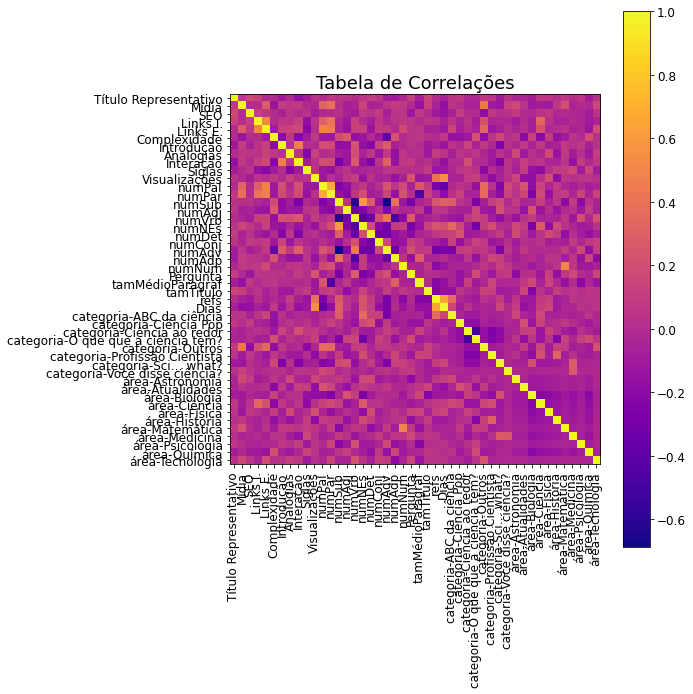

In [30]:
corr = df.corr()
print(corr['Visualizações'].sort_values(ascending=False))
plt.imshow(corr, cmap='plasma', interpolation='none')  
plt.colorbar()
plt.title('Tabela de Correlações')
plt.xticks(range(len(corr)), corr.columns, rotation=90)  
plt.yticks(range(len(corr)), corr.columns);  
plt.savefig("correl.png")
plt.show()

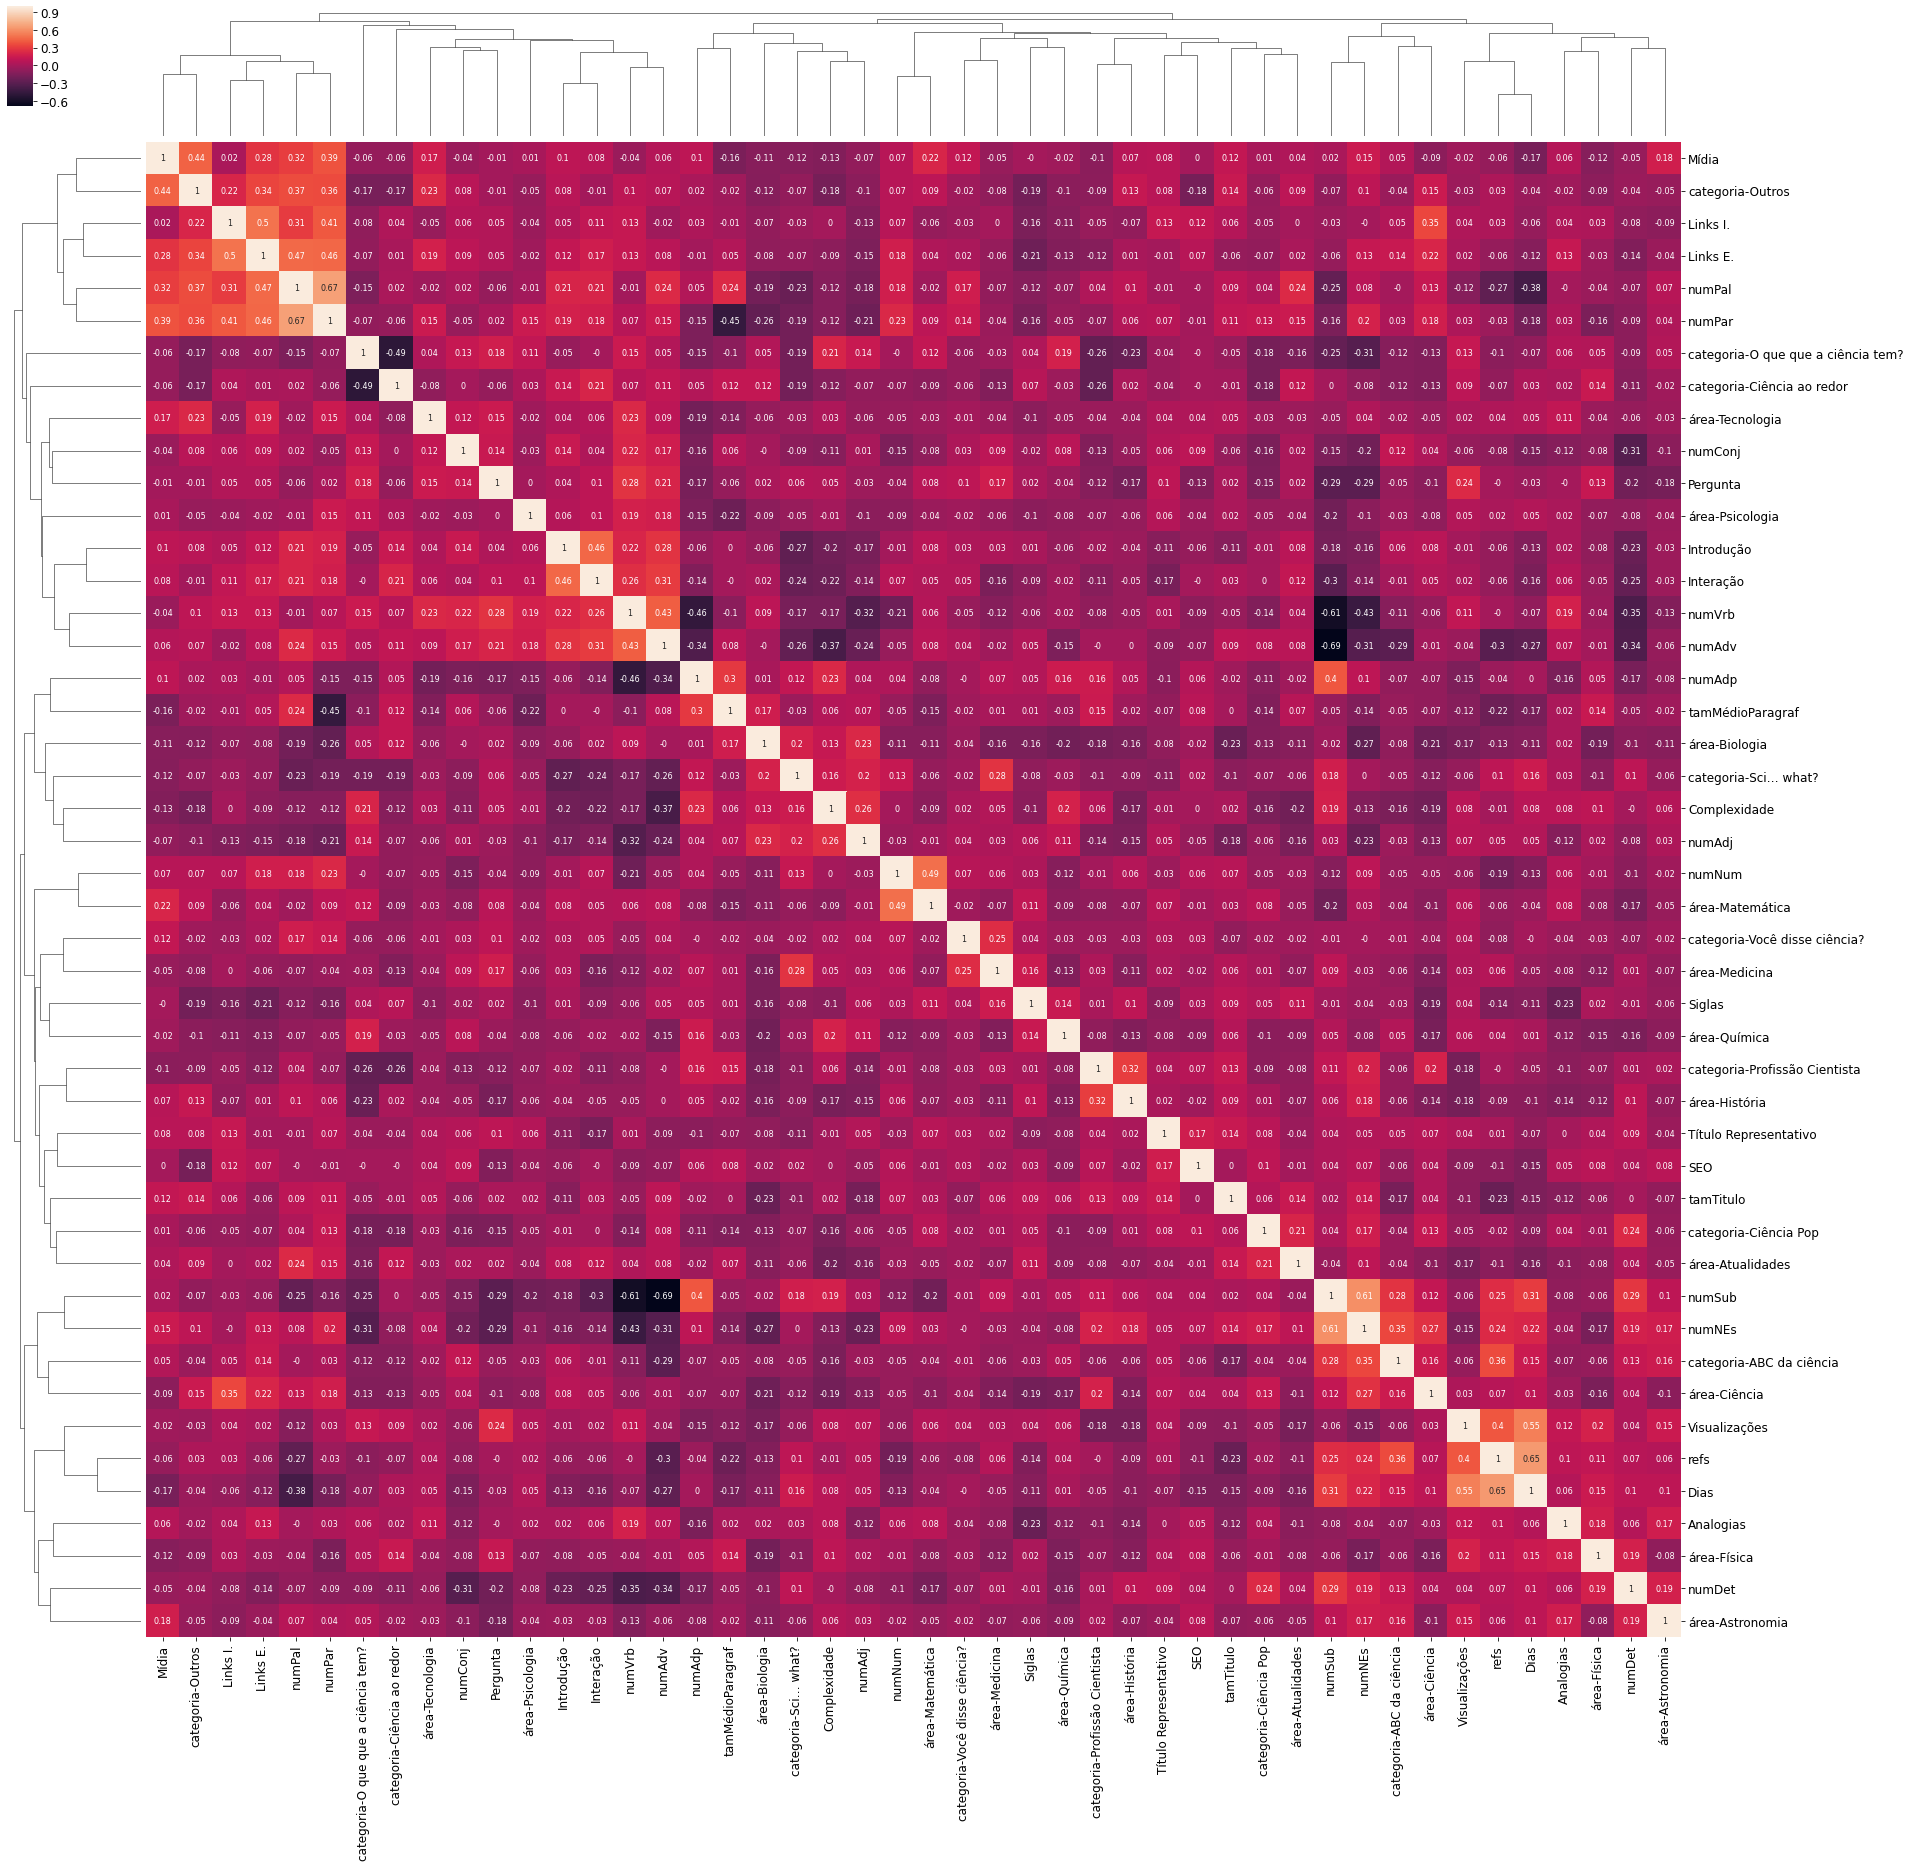

In [31]:
sns.clustermap(round(corr,2),
               figsize=(30,30),
               row_cluster=True,
               col_cluster=True,
               #metric="correlation",
               #standard_scale=1,
               #cbar_pos=(0, .2, .03, .4),
               annot=True,
               annot_kws={'fontsize':8})
#https://seaborn.pydata.org/generated/seaborn.clustermap.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

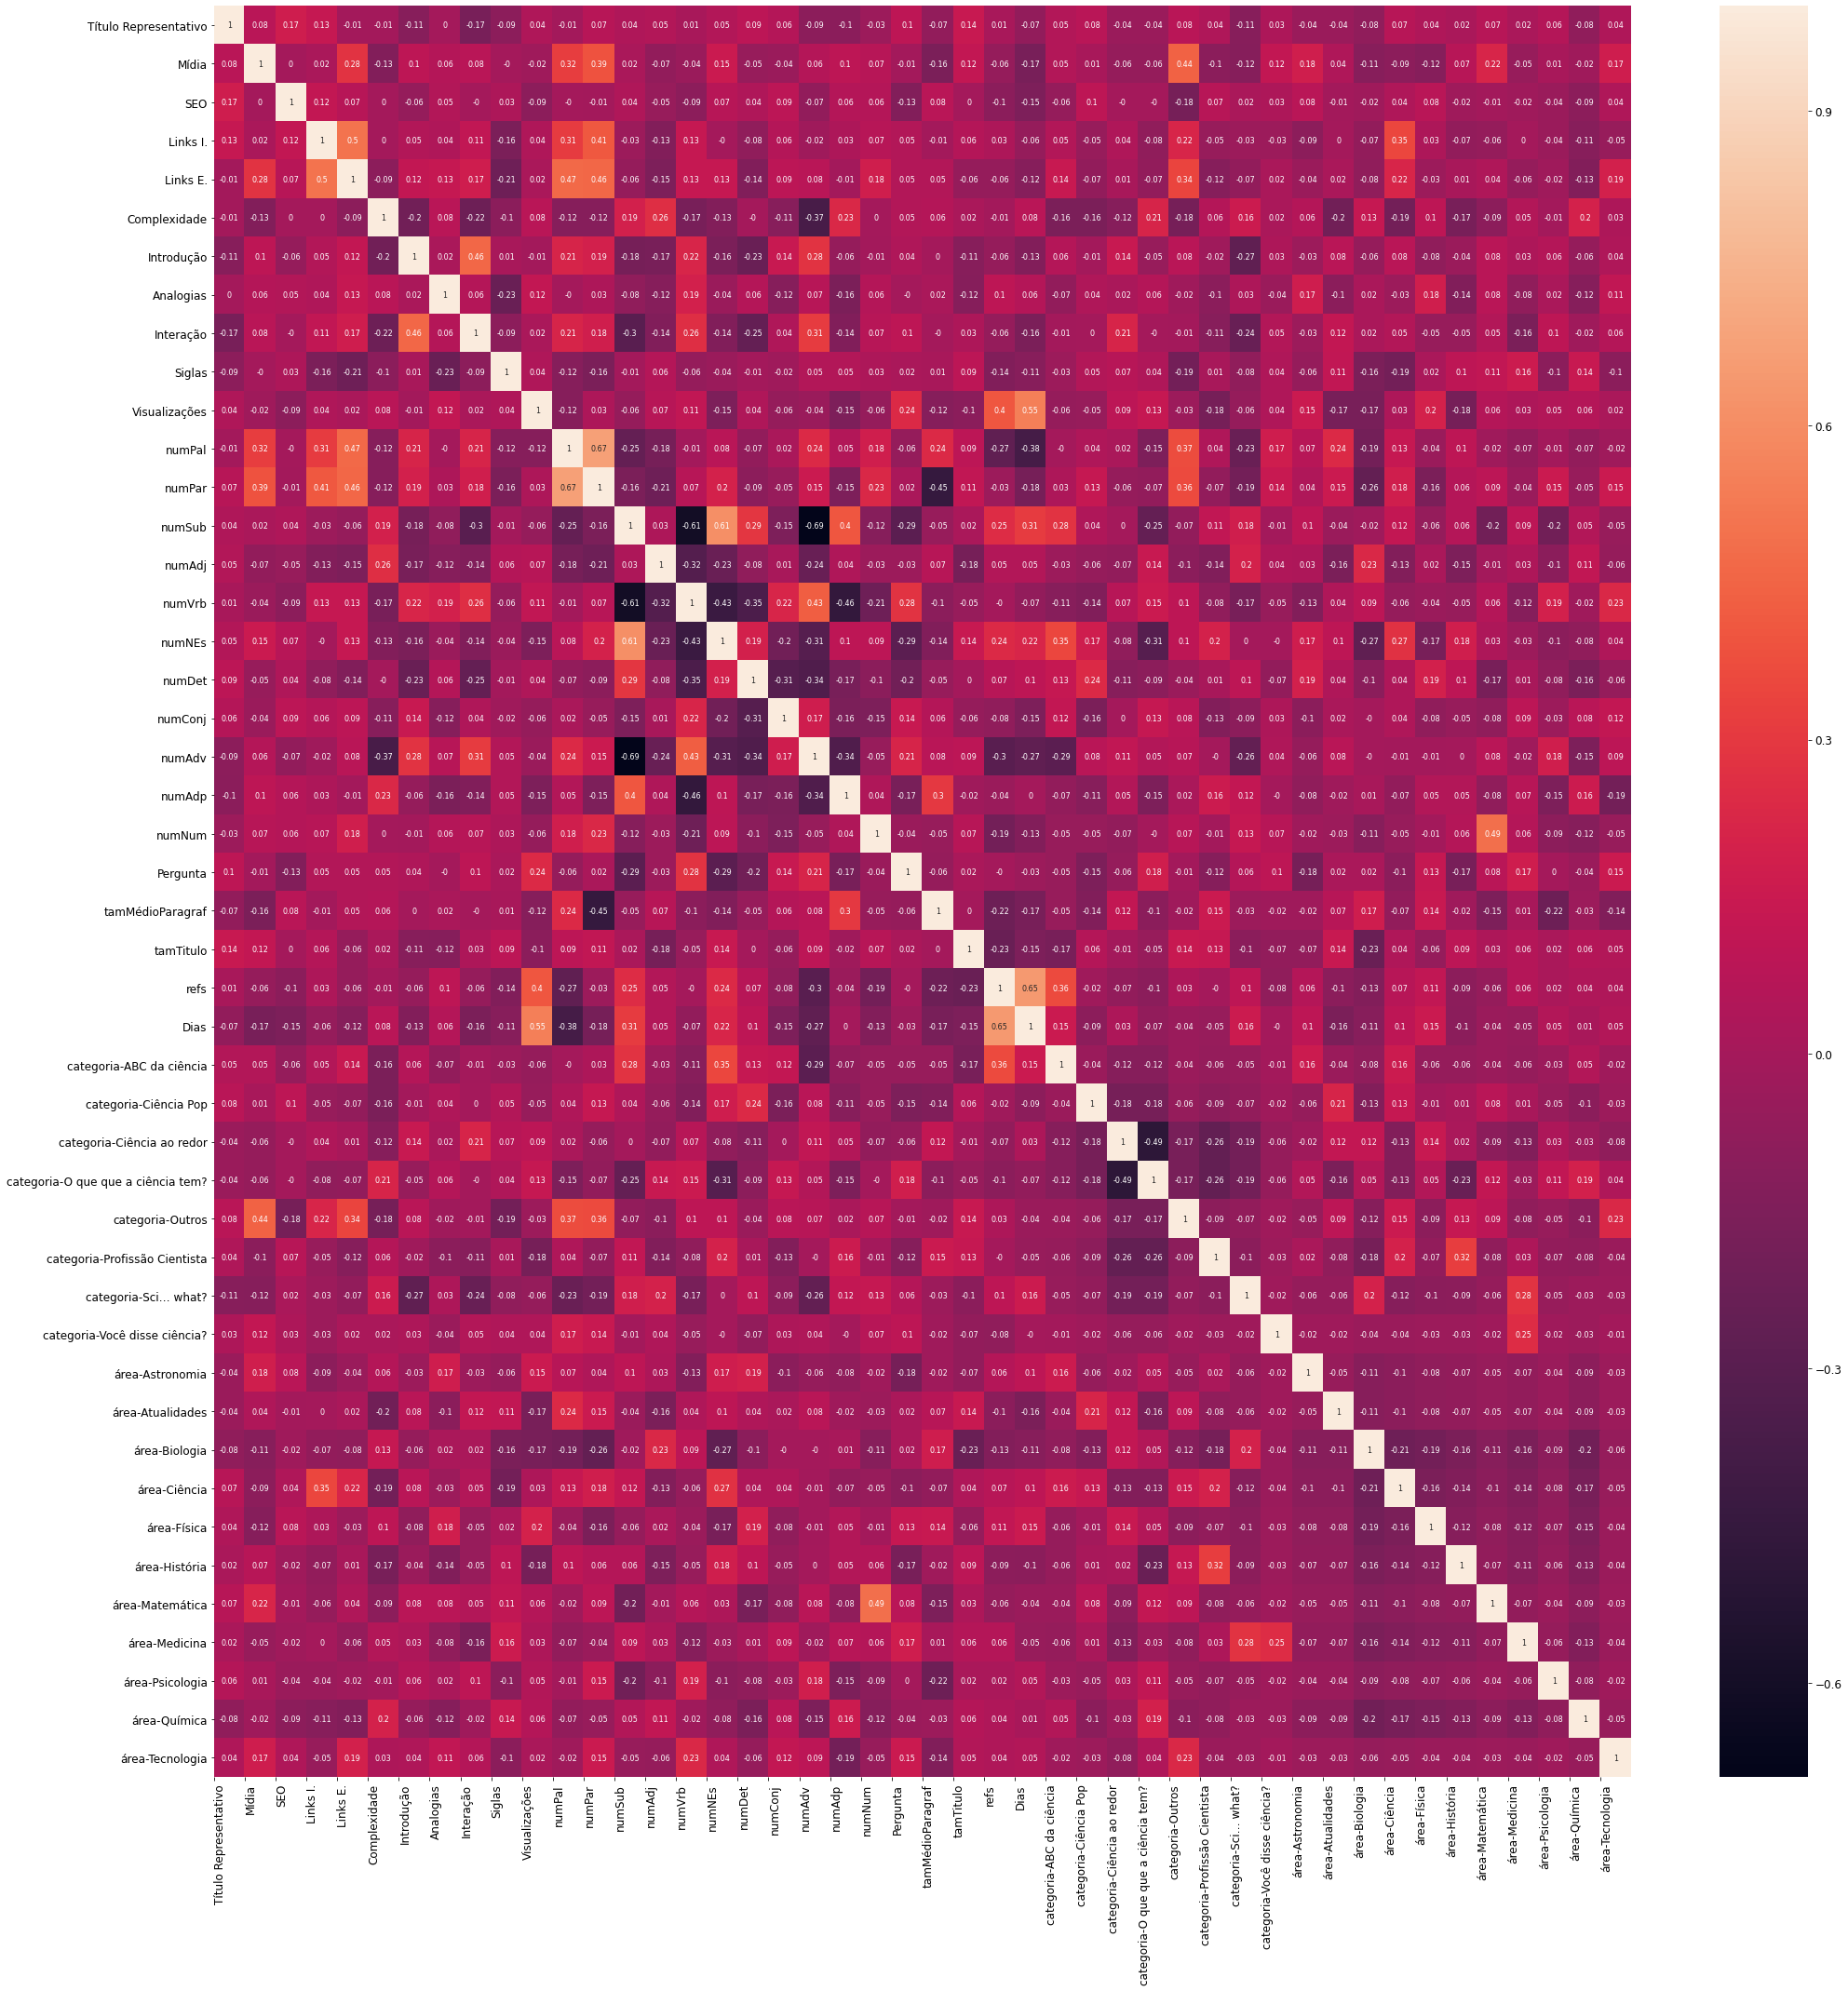

In [32]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(round(corr,2), annot=True, annot_kws={'fontsize':8})
kwargs = {'ha':'left'};
plt.xticks(range(len(corr)), corr.columns, rotation=90, **kwargs);
plt.savefig('correl.pdf')

In [33]:
df.to_excel(r'C:\Users\Acer\Dropbox\UFABC\PGC\dataset-pgc-processed.xlsx', index = False)
y = df.pop('Visualizações')

x = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
print(x.head())
x_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
print(x_minmax.head())

   Título Representativo     Mídia       SEO  Links I.  Links E.  \
0               0.313823 -0.457322 -2.656230 -0.412911 -0.664944   
1               0.313823  0.168260  0.376473 -0.412911 -0.541806   
2               0.313823  3.296167  0.376473 -0.412911  2.536639   
3               0.313823 -0.457322  0.376473 -0.412911 -0.541806   
4               0.313823 -0.457322  0.376473 -0.412911 -0.911220   

   Complexidade  Introdução  Analogias  Interação    Siglas    numPal  \
0     -1.319119    0.339683  -0.434194   0.542810  0.478345 -1.172932   
1     -1.319119    0.339683  -0.434194   0.542810 -2.090543 -0.623648   
2      0.261644    0.339683   2.303117   0.542810 -2.090543  0.495479   
3      0.261644    0.339683   2.303117   0.542810 -2.090543 -1.240490   
4      1.842406   -2.943920  -0.434194  -1.842265  0.478345 -0.550215   

     numPar    numSub    numAdj    numVrb    numNEs    numDet   numConj  \
0 -0.690256  0.738154  0.029374 -0.192238  1.815220 -0.376046  0.134708   
1 

In [34]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(x_minmax, title='Relatório PGC Scaller - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC_Scaller.html")

In [35]:
teste = pd.DataFrame()
teste['DF Completo'] = df.loc[0]
teste['MinMax Scaller'] = x_minmax.loc[0]
teste['Standard Scaller'] = x.loc[0]
teste

,DF Completo,MinMax Scaller,Standard Scaller
Título Representativo,1.0000,1.000000,0.313823
Mídia,1.0000,0.000000,-0.457322
SEO,0.0000,0.000000,-2.656230
Links I.,0.0000,0.000000,-0.412911
Links E.,2.0000,0.036364,-0.664944
Complexidade,1.0000,0.000000,-1.319119
Introdução,1.0000,1.000000,0.339683
Analogias,0.0000,0.000000,-0.434194
Interação,1.0000,1.000000,0.542810
Siglas,1.0000,1.000000,0.478345


In [36]:
df.loc[0]

Título Representativo                   1.0000
Mídia                                   1.0000
SEO                                     0.0000
Links I.                                0.0000
Links E.                                2.0000
Complexidade                            1.0000
Introdução                              1.0000
Analogias                               0.0000
Interação                               1.0000
Siglas                                  1.0000
numPal                                345.0000
numPar                                  9.0000
numSub                                  0.3362
numAdj                                  0.0754
numVrb                                  0.1159
numNEs                                  0.1420
numDet                                  0.1594
numConj                                 0.0406
numAdv                                  0.0464
numAdp                                  0.0899
numNum                                  0.0116
Pergunta     

In [37]:
x_minmax.loc[0]

Título Representativo                 1.000000
Mídia                                 0.000000
SEO                                   0.000000
Links I.                              0.000000
Links E.                              0.036364
Complexidade                          0.000000
Introdução                            1.000000
Analogias                             0.000000
Interação                             1.000000
Siglas                                1.000000
numPal                                0.077048
numPar                                0.075000
numSub                                0.643729
numAdj                                0.338851
numVrb                                0.376988
numNEs                                0.717493
numDet                                0.425092
numConj                               0.369735
numAdv                                0.435754
numAdp                                0.248844
numNum                                0.128746
Pergunta     

In [38]:
x.loc[0]

Título Representativo                 0.313823
Mídia                                -0.457322
SEO                                  -2.656230
Links I.                             -0.412911
Links E.                             -0.664944
Complexidade                         -1.319119
Introdução                            0.339683
Analogias                            -0.434194
Interação                             0.542810
Siglas                                0.478345
numPal                               -1.172932
numPar                               -0.690256
numSub                                0.738154
numAdj                                0.029374
numVrb                               -0.192238
numNEs                                1.815220
numDet                               -0.376046
numConj                               0.134708
numAdv                               -0.469504
numAdp                               -1.384540
numNum                               -0.302498
Pergunta     

In [39]:
dados = [('Dataframe Completo',df),('MimMaxScaller',x_minmax),('StandardScaller',x)]
melhores_metodos = []

In [40]:
def testMethod(X, method):
    lista_MSE = []
    lista_R2 = []
    t=time.perf_counter()

    for i in range (1):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        reg = method
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        lista_MSE.append(mean_squared_error(y_test, y_pred))
        lista_R2.append(r2_score(y_test, y_pred))
        
    pred = reg.predict(X)
    #print("MSE médio: ", np.median(lista_MSE))
    #print("R2 médio: ", np.median(lista_R2))
    if np.median(lista_R2) > maior[0]:
            maior[0] = np.median(lista_R2)
            maior[1] = X.shape[1]
            maior[2] = np.median(lista_MSE)
            maior[3] = reg
    #print(round(time.perf_counter()-t,3), "segundos")
    return np.median(lista_R2), np.median(lista_MSE)

In [41]:
def testGrid(reg, param, dados):
    x_train, x_test, y_train, y_test = train_test_split(dados, y, test_size=0.25)
    gs = GridSearchCV(reg, parameters)
    gs.fit(x_train, y_train)
    y_pred = gs.predict(x_test)
    print(gs.best_estimator_)
    return gs.best_estimator_

In [42]:
def testPCA(method):
    for i in range (2,dado[1].shape[1]):
        #print("\nPCA:",i)
        dadosPCA = PCA(n_components=i).fit_transform(dado[1])
        #print(dadosPCA[0:5])
        #if i == 2:
        #    df_PCA2 = pd.DataFrame(dadosPCA)
        #    showPCA2(df_PCA2[0],df_PCA2[1])
        medias.append(testMethod(dadosPCA,method))

    #print("\nNO PCA")
    medias.append(testMethod(dado[1],method))
    #print(medias)
    print("\n")

In [43]:
def showPCA2(x,y):
    plt.scatter(x,y)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"g--")
    plt.show()

Random Forest

In [44]:
t=time.perf_counter()

parameters = {'n_estimators':[10, 50, 100, 150, 200, 250, 300],
              'min_samples_leaf':[1, 5, 10, 15, 20]}

regressor = RandomForestRegressor()
medias_RF = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_RF.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


Melhor desempenho:
R2 score: 0.3965341034955342
MSE: 75093.50736290908
PCA: 2

MimMaxScaller
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
        

In [45]:
#print(medias_RF[2])
#print(medias_RF[0][9])

SVR linear

In [46]:
t=time.perf_counter()

parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

regressor = SVR(kernel='linear')
medias_SVR = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_SVR.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.4273040848733701
MSE: 92830.60429639816
PCA: 40

MimMaxScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.039922625793966326
MSE: 98890.95146359772
PCA: 27

StandardScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.2272802369196334
MSE: 86575.79770274443
PCA: 43

11.291 segundos


In [47]:
#print(medias_SVR[2])
#print(medias_SVR[0][9])

Regressão Linear

In [48]:
t=time.perf_counter()

parameters = {'normalize':[False, True]}

regressor = LinearRegression()
medias_RL = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_RL.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Melhor desempenho:
R2 score: 0.40452616709735145
MSE: 74614.97825703831
PCA: 21

MimMaxScaller
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Melhor desempenho:
R2 score: 0.42351797310805206
MSE: 86124.55693693925
PCA: 15

StandardScaller
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Melhor desempenho:
R2 score: 0.41419121584222895
MSE: 96570.89472180541
PCA: 31

1.23 segundos


In [49]:
#print(medias_RL[2])
#print(medias_RL[0][9])

MLP

In [50]:
t=time.perf_counter()

parameters = {'hidden_layer_sizes':[10, 20, 50, 100, 150, 200, 250, 300]}

regressor = MLPRegressor()
medias_MLP = []

maior = [-1,0,0,regressor]
for dado in dados[:-1]:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_MLP.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)


Melhor desempenho:
R2 score: 0.4467495133900692
MSE: 82753.14269581572
PCA: 27

MimMaxScaller
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='a

In [51]:
#print(medias_MLP[2])
#print(medias_MLP[0][9])

KNN

In [52]:
t=time.perf_counter()

parameters = {'n_neighbors':[1, 3, 5, 15, 25, 35, 45, 55],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

regressor = KNeighborsRegressor()
medias_KNN = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_KNN.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')


Melhor desempenho:
R2 score: 0.35738080172387676
MSE: 89616.88886486487
PCA: 35

MimMaxScaller
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                    weights='distance')


Melhor desempenho:
R2 score: 0.1836081761599364
MSE: 89753.56490053768
PCA: 24

StandardScaller
KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


Melhor desempenho:
R2 score: 0.275884733142743
MSE: 77965.69283659826
PCA: 35

4.455 segundos


In [53]:
#print(medias_KNN[2])
#print(medias_KNN[2][10])

In [54]:
#melhores_metodos = [RandomForestRegressor, SVR Linear, LinearRegression, MLPRegressor, KNeighborsRegressor]
num = 0
predictions = []
for metodo in melhores_metodos:
    predictions.append(metodo.predict(df))
print(melhores_metodos[num])
i = 0
for view in y:
    #print("Predict:",int(round(predictions[num][i])),"\tReal:",view)
    i=i+1

    
print("R2:", r2_score(y, predictions[num]))
print("MSE:", mean_squared_error(y, predictions[num]))
print("Erro médio:", np.mean(np.abs((predictions[num]-y)/y)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.44487182342432485
MSE: 75694.67226342314
Erro médio: 0.9115739175705849


In [55]:
total = round(time.perf_counter()-t_total,3)
print(total, "segundos")
print(total/60, "minutos")

235.242 segundos
3.9206999999999996 minutos


In [56]:
dfcomp_minmax_std = 0    # 0 = df_completo, 1 = minmax scaller, 2 = std_scaller
r2_mse = 0               # 0 = r2 score, 1 = MSE

linharfR2 = []
linhasvrR2 = []
linharlR2 = []
linhamlpR2 = []
linhaknnR2 = []
pcas = []
for i in range (42):
    linharfR2.append(medias_RF[dfcomp_minmax_std][i][r2_mse])
    linhasvrR2.append(medias_SVR[dfcomp_minmax_std][i][r2_mse])
    linharlR2.append(medias_RL[dfcomp_minmax_std][i][r2_mse])
    linhamlpR2.append(medias_MLP[dfcomp_minmax_std][i][r2_mse])
    linhaknnR2.append(medias_KNN[dfcomp_minmax_std][i][r2_mse])
    pcas.append(i+2)
    
    
#print(pcas)

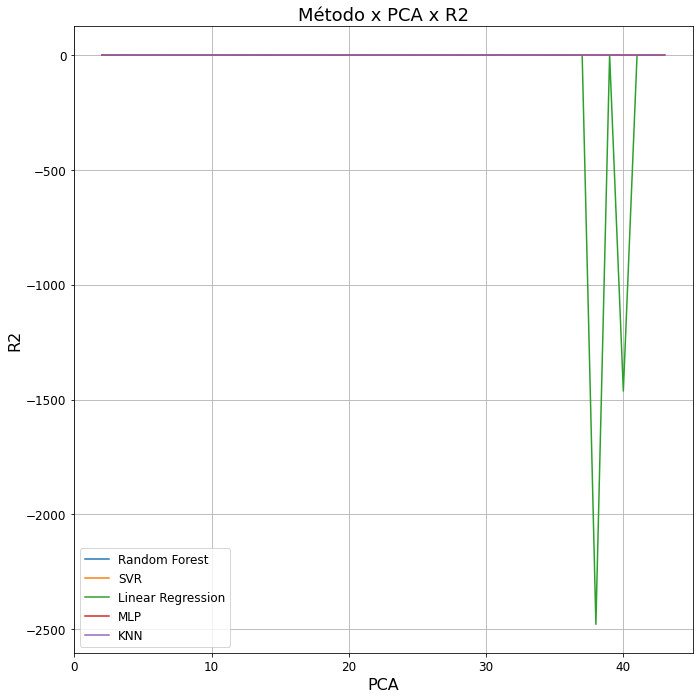

In [57]:
plt.grid()
sns.lineplot(x=pcas, y=linharfR2)
sns.lineplot(x=pcas, y=linhasvrR2)
sns.lineplot(x=pcas, y=linharlR2)
sns.lineplot(x=pcas, y=linhamlpR2)
sns.lineplot(x=pcas, y=linhaknnR2)
plt.title('Método x PCA x R2')
plt.xlabel('PCA')
plt.ylabel('R2')
plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.savefig('comparacao1.pdf')